In [125]:
import DataImport_header as h
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy import stats
from scipy.ndimage.filters import uniform_filter1d

from scipy import constants
from timeit import timeit

import Analysis_header as an
import scipy.fftpack
import scipy.optimize

C:\Users\Brian Bostwick\AppData\Local\Temp\ipykernel_4988\2281188213.py:7: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


In [126]:
#contants
e       = sp.constants.value(u'elementary charge')            #1.602176634e-19 C
epsilon = sp.constants.value(u'vacuum electric permittivity') #8.8541878128e-12 F m^-1
pi      = sp.pi                                               #3.141592653589793
m_e     = sp.constants.value(u'electron mass')                #9.1093837015e-31 kg
c       = sp.constants.value(u'speed of light in vacuum')     #299792458.0 m s^-1

kg2amu = sp.constants.value(u'kilogram-atomic mass unit relationship') #6.0221407621e+26 u
amu2kg = 1/kg2amu

line = "____________________________________________________"
bline= "===================================================="

def trap_freq( position, PosData, dt, steps, period):
    time = np.linspace(0, steps*dt, int(steps/period))
    x  = an.reformat(PosData, position)
    fit = an.fit_sin(time, x)
    fit_curve = fit["fitfunc"]
    return fit["omega"]
    
def total_energy(w, mass, x, v):
    return 0.5 * mass * v**2 + 0.5 * mass * w**2 * x**2 

In [127]:
dt    = 1.0e-7      #meters
steps = 200000
period = 1         #interval for taking data
mass  = 87*1.66e-27 #amu

pos  = "/pos"
vel  = "/vel"

#workcomupterv
filePos = "../evaperative_cooling" + pos + ".txt"
fileVel = "../evaperative_cooling" + vel + ".txt"

PosData = an.get_particle_data( filePos )
VelData = an.get_particle_data( fileVel )

In [128]:
#getting trap frequecny
wx = trap_freq( 0, PosData[2], dt, steps, period)
wy = trap_freq( 1, PosData[2], dt, steps, period)
wz = trap_freq( 2, PosData[2], dt, steps, period)

print(f"trap freq wx, wy, wz = {wx, wy, wz}")

trap freq wx, wy, wz = (42148.03793359302, 42148.03793359302, 59605.89620017899)


In [129]:
#getting velocity
velocity = [an.get_particle_velocity(VelData[2][i][0]) for i in range(len(VelData[2]))]

vx = [ VelData[2][i][0][0] for i in range(len(VelData[2])) ]
vy = [ VelData[2][i][0][1] for i in range(len(VelData[2])) ]
vz = [ VelData[2][i][0][2] for i in range(len(VelData[2])) ]

#getting positions; all position ar taken rel. to the beam direction.
x  = an.reformat(PosData[2], 0)
y  = an.reformat(PosData[2], 1)
z  = an.reformat(PosData[2], 2)

E_x = [ total_energy(wx, mass, x[i], vx[i]) for i in range(len(x)) ]
E_y = [ total_energy(wy, mass, y[i], vy[i]) for i in range(len(x)) ]
E_z = [ total_energy(wz, mass, z[i], vz[i]) for i in range(len(x)) ]

#getting total energy
energy = [ E_x[i] + E_y[i] + E_z[i] for i in range(len(E_x)) ]

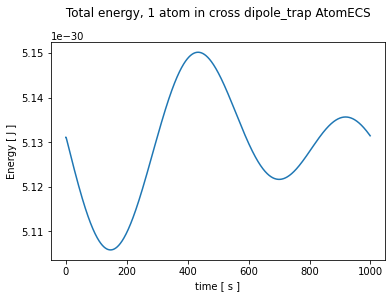

Percent fluctiation = 1.01752 %


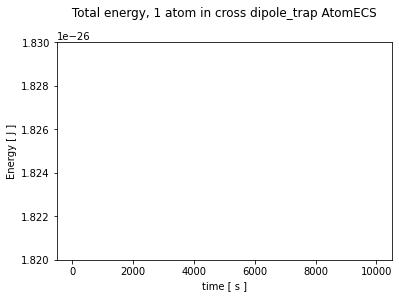

E = 5.131095018143715e-30 J


In [132]:
plt.plot(energy[:1000], "-")
plt.title(" Total energy, 1 atom in cross dipole_trap AtomECS ", y = 1.09)
plt.xlabel("time [ s ]")
plt.ylabel("Energy [ J ]")
plt.show()

print(f"Percent fluctiation = { round( 100 * (max(energy) - min(energy)) / np.mean(energy), 5 )} %")

plt.plot(energy[:10000], "-")
plt.title(" Total energy, 1 atom in cross dipole_trap AtomECS ", y = 1.09)
plt.xlabel("time [ s ]")
plt.ylabel("Energy [ J ]")
plt.ylim(1.82e-26,1.83e-26)
plt.show()

print(f"E = {np.mean(energy)} J")